In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
bench_data = Table.read('conv_benchmark.csv')
repeat = 10

In [3]:
mean = bench_data.group_by(['Image', 'Kernel', 'Implementation']).groups.aggregate(np.mean)

In [4]:
mean['Implementation'] = [i.split('<')[0] for i in mean['Implementation']]

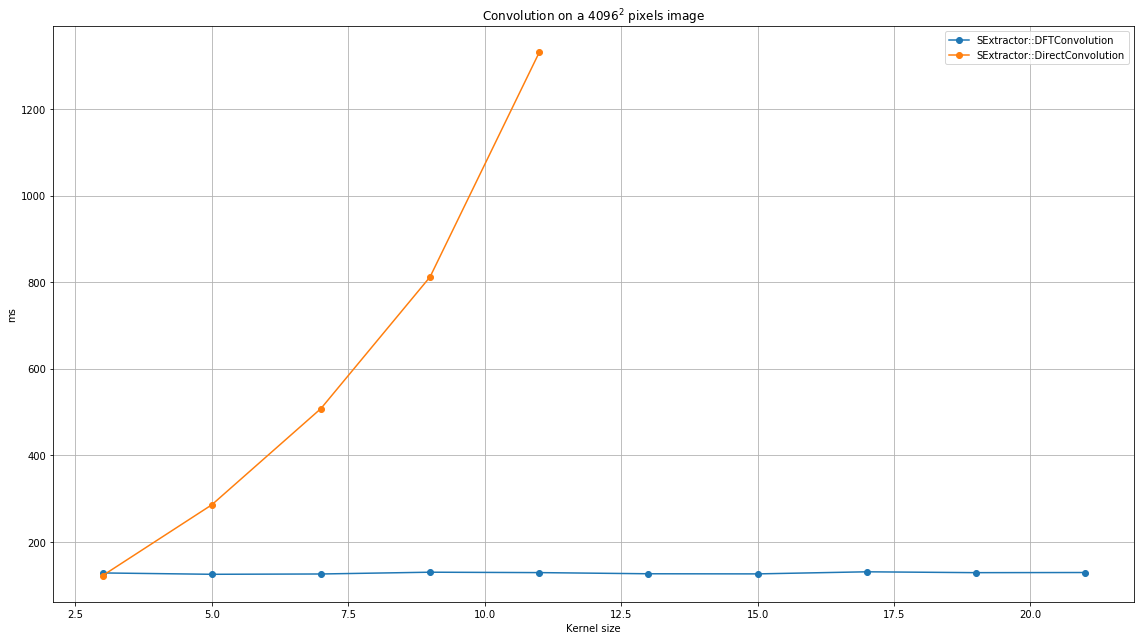

In [5]:
ref_img_size = 4096

_, axs = plt.subplots(1, 1, figsize=(16, 9))

for i in np.unique(mean['Implementation']):
    krn_impl_subset = mean[mean['Implementation'] == i]
    axs.plot(krn_impl_subset['Kernel'], krn_impl_subset['Time']/repeat/1e6, '-o', label=i)
    
axs.legend()
axs.set_xlabel('Kernel size')
axs.set_ylabel('ms')
axs.grid(True)
axs.set_title('Convolution on a $4096^2$ pixels image')

_ = plt.tight_layout()